# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# OpenWeatherMap API Key
api_key = weather_api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [6]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")
#Loop through the cities in the city list 
for city in cities:  
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 1 | Ulkan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=ulkan
Processing Record 2 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=busselton
Processing Record 3 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=hermanus
Processing Record 4 | Avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=avarua
Processing Record 5 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=mar del plata
Processing Record 6 | Tigil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=tigil
Processing Record 7 | Husavik
http://api.openweathermap.org/d

Processing Record 57 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=carnarvon
Processing Record 58 | Lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=lorengau
Processing Record 59 | Khakhea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=khakhea
Processing Record 60 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=hobart
Processing Record 61 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=port alfred
Processing Record 62 | Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=los llanos de aridane
Processing Record 63 | Namatanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e

Processing Record 112 | San Cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=san cristobal
Processing Record 113 | Champerico
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=champerico
City not found. Skipping...
Processing Record 114 | Taganak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=taganak
Processing Record 115 | Lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=lebu
Processing Record 116 | Port Macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=port macquarie
Processing Record 117 | Nebug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=nebug
Processing Record 118 | Port Blair
http://api.openweathermap.org/data/2.5/weather?units=Impe

Processing Record 168 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=jamestown
Processing Record 169 | Memari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=memari
Processing Record 170 | Nioro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=nioro
City not found. Skipping...
Processing Record 171 | Freeport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=freeport
Processing Record 172 | Alta Floresta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=alta floresta
Processing Record 173 | Buraydah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=buraydah
Processing Record 174 | Surab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63

Processing Record 223 | Sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=sisimiut
Processing Record 224 | Skibbereen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=skibbereen
Processing Record 225 | Vermilion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=vermilion
Processing Record 226 | Severnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=severnoye
Processing Record 227 | Northam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=northam
Processing Record 228 | Tucupita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=tucupita
City not found. Skipping...
Processing Record 229 | Dogondoutchi
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 279 | Aviles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=aviles
City not found. Skipping...
Processing Record 280 | Igurusi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=igurusi
Processing Record 281 | Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=ponta do sol
Processing Record 282 | Dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=dikson
Processing Record 283 | Morgan City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=morgan city
Processing Record 284 | Menongue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=menongue
Processing Record 285 | Petatlan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing Record 334 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=talnakh
Processing Record 335 | Rumuruti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=rumuruti
Processing Record 336 | Katobu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=katobu
Processing Record 337 | Yuzhnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=yuzhnyy
Processing Record 338 | Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=saint-pierre
Processing Record 339 | Coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=coquimbo
Processing Record 340 | Samarai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed64

Processing Record 389 | Umtata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=umtata
Processing Record 390 | Kattivakkam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=kattivakkam
Processing Record 391 | Alyangula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=alyangula
Processing Record 392 | Kaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=kaya
Processing Record 393 | Milkovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=milkovo
City not found. Skipping...
Processing Record 394 | Ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=ancud
Processing Record 395 | Ternate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee9038

Processing Record 444 | Gornopravdinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=gornopravdinsk
Processing Record 445 | Salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=salalah
Processing Record 446 | Luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=luderitz
Processing Record 447 | Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=srednekolymsk
City not found. Skipping...
Processing Record 448 | Sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=sur
City not found. Skipping...
Processing Record 449 | Sergeyevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=sergeyevka
Processing Record 450 | Itoman
http://api.openweathermap.org

Processing Record 499 | San Vicente
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=san vicente
Processing Record 500 | Sao Jose da Coroa Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=sao jose da coroa grande
Processing Record 501 | Puerto del Rosario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=puerto del rosario
City not found. Skipping...
City not found. Skipping...
Processing Record 502 | Bilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=bilma
Processing Record 503 | Rybachiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=rybachiy
Processing Record 504 | Tygda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d418e6ee90387fa5da9e3430ed6404&q=tygda
Processing Record 505 | Chos

In [7]:
# Create a dictonary with the lists generated
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}
weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ulkan,100,RU,1570506359,83,57.24,107.32,33.56,8.05
1,Busselton,100,AU,1570506372,32,-33.64,115.35,75.99,9.33
2,Hermanus,33,ZA,1570506105,86,-34.42,19.24,57.00,21.09
3,Avarua,67,CK,1570506401,56,-21.21,-159.78,71.60,8.05
4,Mar del Plata,33,AR,1570506419,44,-46.43,-67.52,48.66,25.57


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_dataframe.count()

City          538
Cloudiness    538
Country       538
Date          538
Humidity      538
Lat           538
Lng           538
Max Temp      538
Wind Speed    538
dtype: int64

In [9]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ulkan,100,RU,1570506359,83,57.24,107.32,33.56,8.05
1,Busselton,100,AU,1570506372,32,-33.64,115.35,75.99,9.33
2,Hermanus,33,ZA,1570506105,86,-34.42,19.24,57.00,21.09
3,Avarua,67,CK,1570506401,56,-21.21,-159.78,71.60,8.05
4,Mar del Plata,33,AR,1570506419,44,-46.43,-67.52,48.66,25.57


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

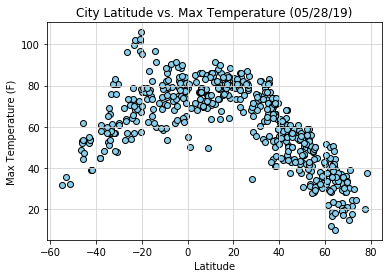

In [10]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("CityLat_vs_Temp.png")
plt.show()

In [ ]:
#This observation suggest higher latitude equals a drop in temperature.

#### Latitude vs. Humidity Plot

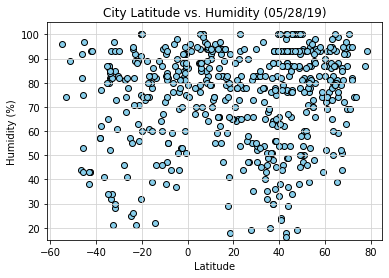

In [11]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("CityLat_vs_Humidity.png")
plt.show()

In [ ]:
#This observation suggesst more clusters of high humididty at the top or northern hemisphere

#### Latitude vs. Cloudiness Plot

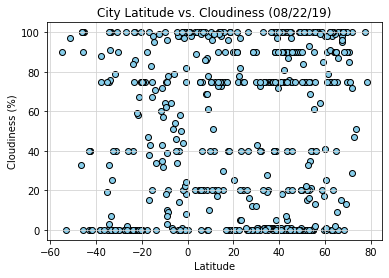

In [12]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (08/22/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("CityLat_vs_Cloudiness.png")
plt.show()

In [ ]:
#This observation suggest an even split between north and south hemispheres 

#### Latitude vs. Wind Speed Plot

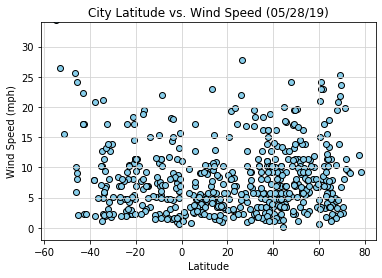

In [13]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("CityLat_vs_WindSpeed.png")
plt.show()

In [ ]:
#This observation suggests high wind speeds in the southern hemisphere

## Linear Regression

In [19]:
import csv
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd

In [20]:
x_values = weather_dataframe["Lat"]
y_values = weather_dataframe["Max Temp"]

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.31x +68.07


The r-squared is: -0.5483435603218221


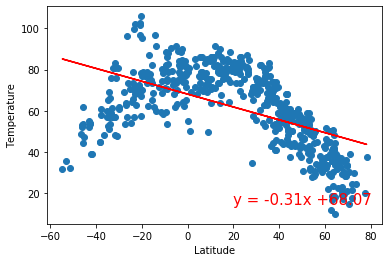

In [34]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression